### Data Set Information:
Bank Marketing Data Set: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing 

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010)

### Attribute Information:
#### Input variables:
##### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

##### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
input_path = "../data/bank-additional-full.csv"
df = pd.read_csv(input_path)

In [3]:
# check basic information of datasets
df.dtypes # data type

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
df.describe() # statistic information of numeric variables

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.head() # first 5 records

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


y
no     36548
yes     4640
dtype: int64


Text(0.5,1,'Distribution of "y"')

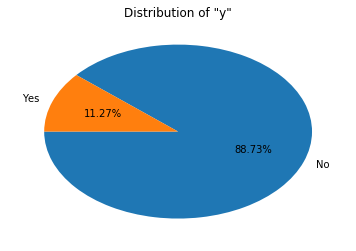

In [6]:
# check balance or imbalance of datasets
print(df.groupby('y').size()) 

# Percentage of value "yes" in "y"
plt.pie([pd.value_counts(df['y'])[0], pd.value_counts(df['y'])[1]], labels=["No", "Yes"], startangle=180, autopct='%1.2f%%')
plt.title('Distribution of "y"')

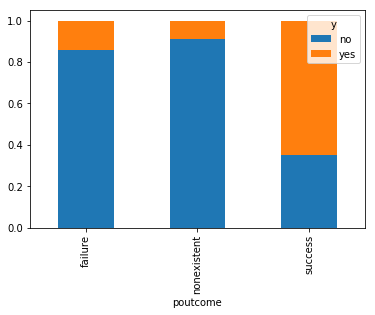

In [7]:
# for "poutcome"
cross = pd.crosstab(df['poutcome'], df['y'])
cross = cross.div(cross.sum(1).astype(float), axis=0)
cross.plot(kind='bar', stacked=True, grid=False)

In [8]:
# As described in dataset, "duration" should be discarded
df.drop(['duration', 'poutcome'], axis=1, inplace=True) # remove "duration" and keep modification

In [9]:
# There is no missing data in numeric variables, while "unknown" exits in categorical variables
# compute percentage of unknown values
df.replace('unknown', np.nan, inplace=True)
for i in df.columns:
    if type(df[i][0]) is str:
        print("In " + i + ", There are " + str(round((df[i].isnull().sum()/len(df[i]))*10, 2)) + "% unknown value")

In job, There are 0.08% unknown value
In marital, There are 0.02% unknown value
In education, There are 0.42% unknown value
In default, There are 2.09% unknown value
In housing, There are 0.24% unknown value
In loan, There are 0.24% unknown value
In contact, There are 0.0% unknown value
In month, There are 0.0% unknown value
In day_of_week, There are 0.0% unknown value
In y, There are 0.0% unknown value


In [10]:
# for 'job' and 'marital', directly delete 
df.dropna(subset=['job'], axis=0, inplace = True) 
df.reset_index(drop = True, inplace = True)
df.dropna(subset=['marital'], axis=0, inplace = True) 
df.reset_index(drop = True, inplace = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
# for 'education', 'default', 'housing', 'loan', replacing them

# Replace by frequency
for i in df.columns:
    if type(df[i][0]) is str:
        print("In " + i + ", There are " + str(round((df[i].isnull().sum()/len(df[i]))*10, 2)) 
              + "% unknown value and highest frequency is " + str(df[i].value_counts().idxmax()))

In job, There are 0.0% unknown value and highest frequency is admin.
In marital, There are 0.0% unknown value and highest frequency is married
In education, There are 0.39% unknown value and highest frequency is university.degree
In default, There are 2.07% unknown value and highest frequency is no
In housing, There are 0.24% unknown value and highest frequency is yes
In loan, There are 0.24% unknown value and highest frequency is no
In contact, There are 0.0% unknown value and highest frequency is cellular
In month, There are 0.0% unknown value and highest frequency is may
In day_of_week, There are 0.0% unknown value and highest frequency is thu
In y, There are 0.0% unknown value and highest frequency is no


In [12]:
df['education'].replace(np.nan, "university.degree", inplace = True)
df['default'].replace(np.nan, "no", inplace = True)
df['housing'].replace(np.nan, "yes", inplace = True)
df['loan'].replace(np.nan, "no", inplace = True)

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
# for 'default', 'housing', 'loan', they are all bianry variables
def encode_bin(df, bin_feat):    
    for i in bin_feat:
        df.loc[df[i] == 'no', i] = 0
        df.loc[df[i] == 'yes', i] = 1
    return df

In [18]:
# for ordered categorical variable, such as "education"
def encode_ordered(df):
    values = ["illiterate", "basic.4y", "basic.6y", "basic.9y", "high.school",  "professional.course", "university.degree"]
    levels = range(1, len(values)+1)
    dict_levels = dict(zip(values, levels))
    for v in values:
        df.loc[df['education'] == v, 'education'] = dict_levels[v]
    return df

In [15]:
# for unordered categorical variable, such as "job", "marital", "contact", "month", and "day_of_week"
# dummy variables encoding
def encode_unordered(df, unordered_feat):
    for i in unordered_feat:
        dummies_df = pd.get_dummies(df[i])
        dummies_df = dummies_df.rename(columns=lambda x: i+'_'+str(x))
        df = pd.concat([df,dummies_df], axis=1)
        df.drop(i, axis=1, inplace=True)
    return df

In [16]:
# Numeric variables standardization
def trans_num_attrs(df, num_feat):   
    for i in num_feat: 
        scaler = preprocessing.StandardScaler()
        df[i] = scaler.fit_transform(df[i][:,np.newaxis])
    return df

In [19]:
### pre-processing
num_feat = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 
                 'cons.conf.idx', 'euribor3m', 'nr.employed']
bin_feat = ['default', 'housing', 'loan', 'y']
unordered_feat = ['job', 'marital', 'contact', 'month', 'day_of_week']

### convert categorical variables to numeric variables
df = encode_bin(df, bin_feat)
df = encode_ordered(df)
df = encode_unordered(df, unordered_feat)

df = trans_num_attrs(df, num_feat)

In [20]:
### save pre-processing dataset
df.to_csv('../data/clean_df.csv')